# Heart Disease Data Modelling

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

## Load the data

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## OVERVIEW

**Dataset statistics**
- **Number of rows: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 1025**
- **Number of columns: $\;\;\;\;\;\;\;\;\;\;\;\;\;$ 14**
- **Missing values: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0** 
- **Missing values (%): $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 0.0%**

## Number of rows and columns

In [3]:
data.shape

(1025, 14)

## Column names

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**AGE:** $\;\;\;\;\;\;\;\;\;\;\;\;$ Age in years </br>
**SEX:** $\;\;\;\;\;\;\;\;\;\;\;\;$ 1 = Male; 0 = Female </br>
**CP:** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Chest Pain type </br>
**TRESTBPS:** $\;\;\;$ Resting Blood Pressure (in mm Hg on Admission to the Hospital) </br>
**CHOL:** $\;\;\;\;\;\;\;\;\;\;$ Serum Cholestoral in mg/dl </br>
**FPS:** $\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False) </br>
**RESTECH:** $\;\;\;\;\;$ Resting Electrocardiographic Results </br>
**THALACH:** $\;\;\;\;\;$ Maximum Heart Rate Achieved </br>
**EXANG:** $\;\;\;\;\;\;\;\;\;$ Exercise induced Angina (1 = yes; 0 = no) </br>
**OLDPEAK:** $\;\;\;\;\;$ ST Depression induced by Exercise Relative to Rest </br>
**SLOPE:** $\;\;\;\;\;\;\;\;\;$ The Slope of the Peak Exercise ST Segment </br>
**CA:** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Number of Major Vessels (0-3) Colored by Flourosopy </br>
**THAL:** $\;\;\;\;\;\;\;\;\;\;\;$ 3 = Normal; 6 = Fixed Defect; 7 = Reversable Defect </br>
**TARGET:** $\;\;\;\;\;\;\;\;$ 1 or 0

## Column INFO

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Column Data Types

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

After a quick glimpse of the data set to get an initial understanding of the variables and their formats, the next step is to check for the number of missing values in each column.

## Missing values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now there are no null values. Now look for unique values in each columns.

In [8]:
print ("Age                                                :", data.age.unique())
print ("\n\nSex                                                :", data.sex.unique())
print ("\n\nChest Pain                                         :", data.cp.unique())
print ("\n\nResting Blood Pressure                             :", data.trestbps.unique())
print ("\n\nSerum Cholestoral in mg/dl                         :", data.chol.unique())
print ("\n\nFasting Blood Sugar > 120 mg/dl                    :", data.fbs.unique())
print ("\n\nResting Electrocardiographic Results               :", data.restecg.unique())
print ("\n\nMaximum Heart Rate Achieved                        :", data.thalach.unique())
print ("\n\nExercise induced Angina                            :", data.exang.unique())
print ("\n\nST Depression induced by Exercise Relative to Rest :", data.oldpeak.unique())
print ("\n\nThe Slope of the Peak Exercise ST Segment          :", data.slope.unique())
print ("\n\nNumber of Major Vessels (0-3) colored by Flourosopy:", data.ca.unique())
print ("\n\n3 = Normal; 6 = Fixed Defect; 7 = Reversable Defect:", data.thal.unique())
print ("\n\nTarget                                             :", data.target.unique())

Age                                                : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]


Sex                                                : [1 0]


Chest Pain                                         : [0 1 2 3]


Resting Blood Pressure                             : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]


Serum Cholestoral in mg/dl                         : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172

## Numerical Data

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## Data Analysis

### How many Male and Female present

In [10]:
data["sex"].agg(["value_counts"])

,value_counts
1,713
0,312


### Sex-wise Chest Pain Classification

In [11]:
data.groupby("sex")["cp"].agg(["value_counts"])

value_counts
sex cp              
0   0            133
    2            109
    1             57
    3             13
1   0            364
    2            175
    1            110
    3             64

### How many people have LDL (bad) Cholesterol

In [12]:
data[data["chol"] < 130]["chol"].count()

3

### How many people have HDL (good) Cholesterol

In [13]:
data[data["chol"] >= 45]["chol"].count()

1025

### Resting Electrocardiographic-wise Age count

In [14]:
data.groupby("restecg")["age"].agg(["count"])

,count
restecg,
0,497
1,513
2,15


### How many '0' and '1' we have in our Dependent Variable

In [15]:
data["target"].agg(["value_counts"])

,value_counts
1,526
0,499


## Data Visualization

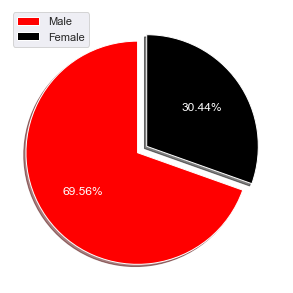

In [16]:
sex = ["Male", "Female"]
values = data["sex"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

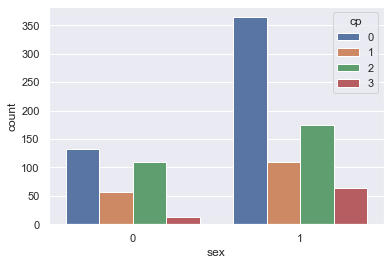

In [17]:
sns.countplot(x = "sex", data = data, hue = "cp");

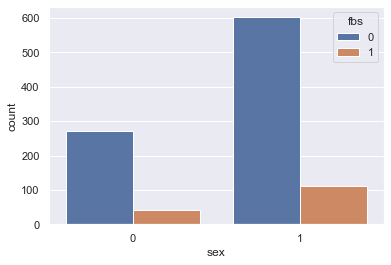

In [18]:
sns.countplot(x = "sex", data = data, hue = "fbs");

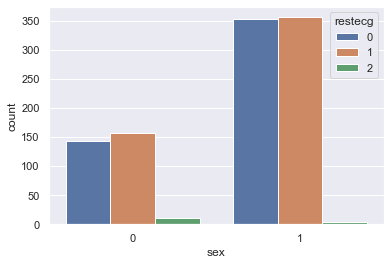

In [19]:
sns.countplot(x = "sex", data = data, hue = "restecg");

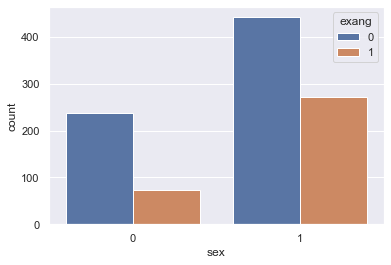

In [20]:
sns.countplot(x = "sex", data = data, hue = "exang");

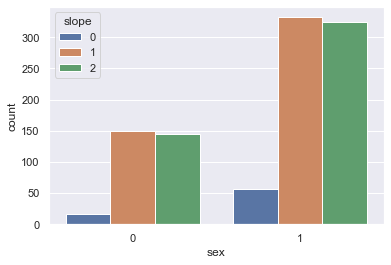

In [21]:
sns.countplot(x = "sex", data = data, hue = "slope");

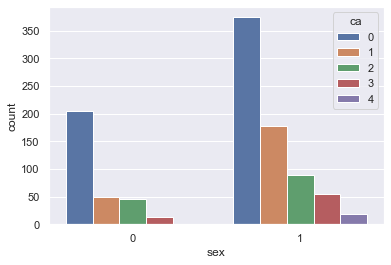

In [22]:
sns.countplot(x = "sex", data = data, hue = "ca");

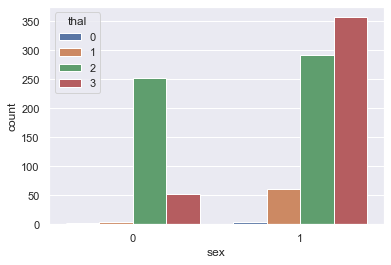

In [23]:
sns.countplot(x = "sex", data = data, hue = "thal");

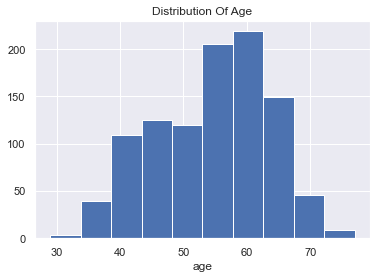

In [24]:
plt.hist(data["age"])
plt.title("Distribution Of Age")
plt.xlabel("age");

## Checking Normal Distribution of Data

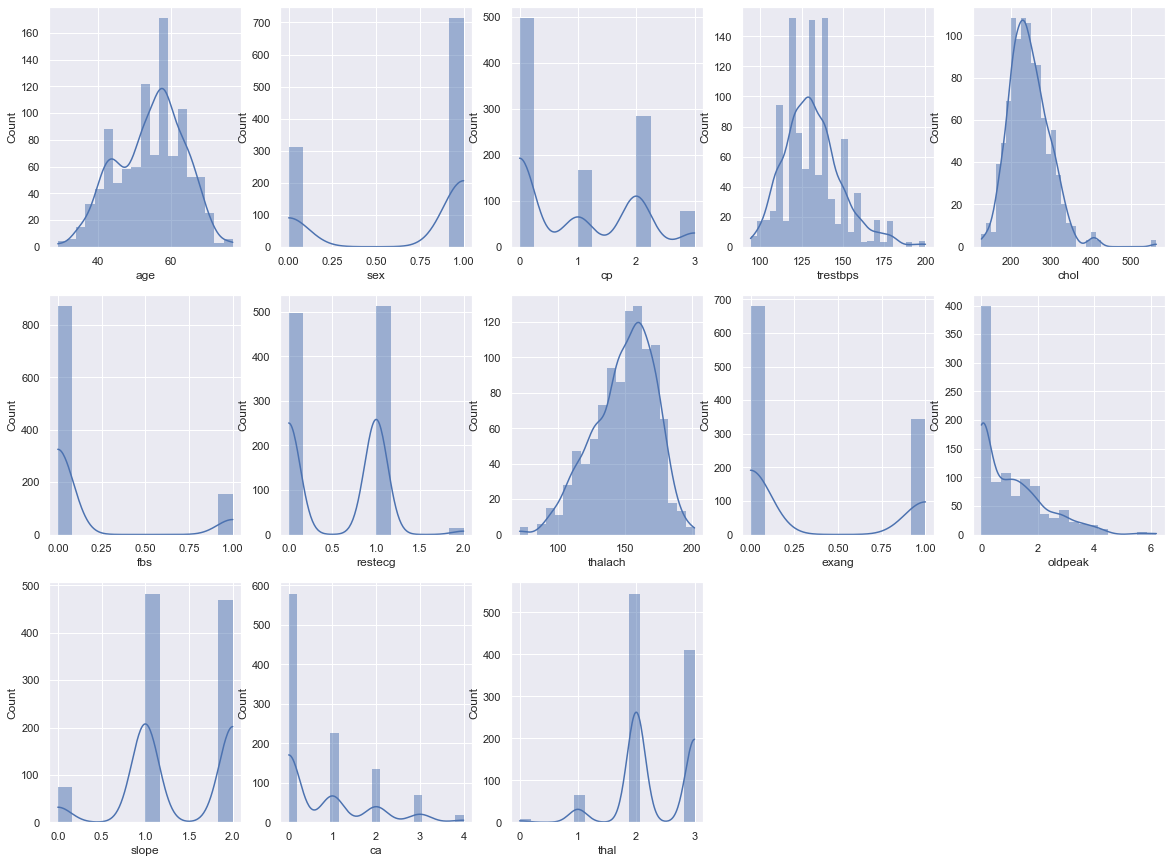

In [25]:
col = 1
plt.figure(figsize = (20, 15))
for i in data.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        sns.histplot(data[i], kde = True, linewidth = 0)
        plt.xlabel(i)
    col = col + 1

## Checking Outliers

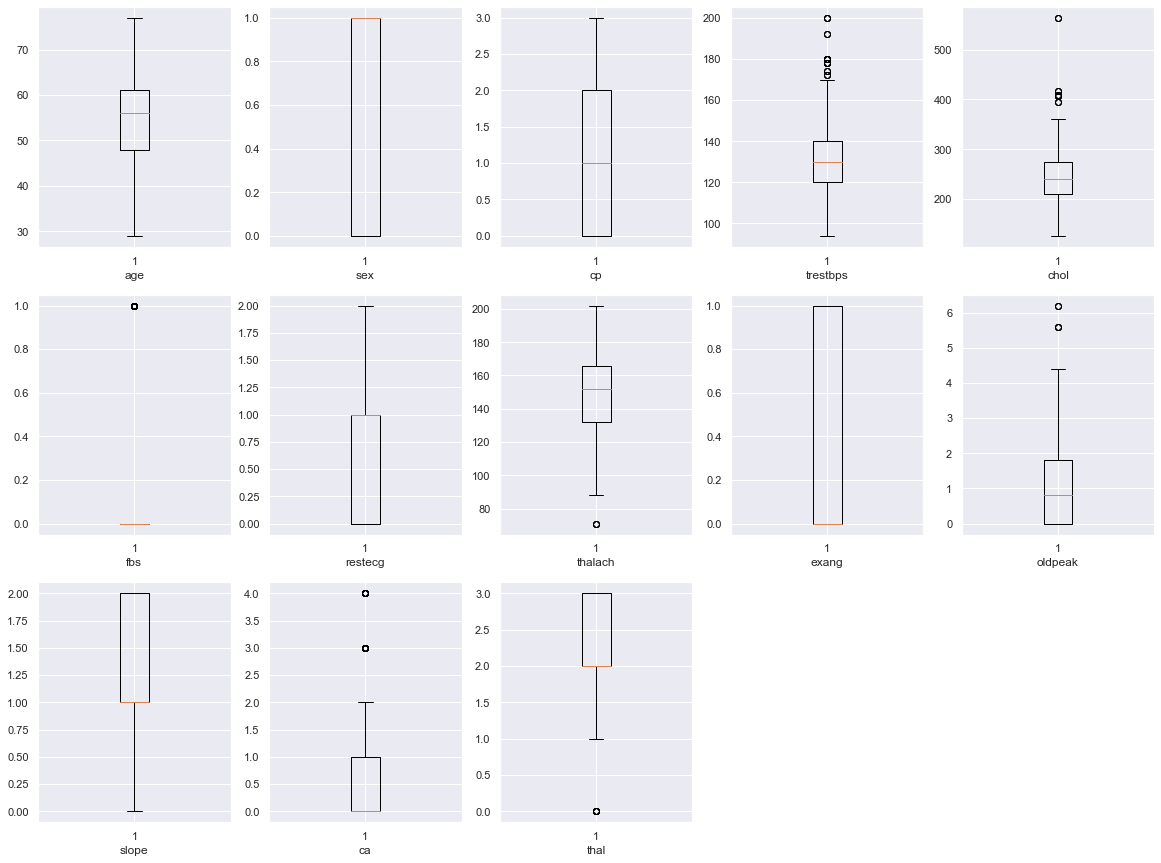

In [26]:
col = 1
plt.figure(figsize = (20, 15))
for i in data.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        plt.boxplot(data[i])
        plt.xlabel(i)
    col = col + 1

## Correlation Heatmap

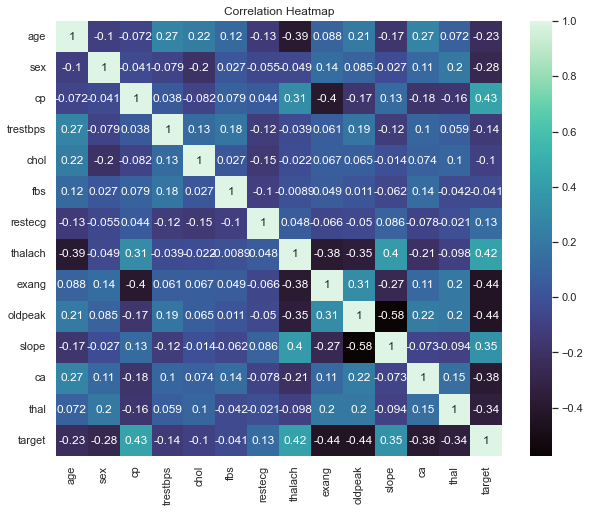

In [27]:
x = data.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(x,annot = True, cmap = "mako")
plt.title("Correlation Heatmap");

# Model Implementation

## Define the Dependent and the Independent Variables

In [28]:
x = data.drop(columns = ["target"], axis = 1)
y = data["target"]

## Scaling of Data using MinMaxScaler

In [29]:
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

## Training the Data

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state= 0)

In [31]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(x_test)

## Accuracy Score

In [33]:
acc = accuracy_score(y_test, y_pred)
acc

0.8798701298701299

## F1 Score 

In [34]:
f1 = f1_score(y_test,y_pred)
f1

0.8902077151335311

## Confusion Matrix

In [35]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[121,  24],
       [ 13, 150]], dtype=int64)

## Scaling of Data using RobustScaler

In [36]:
x_scaled = RobustScaler()
x_scaled = x_scaled.fit_transform(x)

## Training the Data

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state= 34)

In [38]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [39]:
y_pred = log_reg.predict(x_test)

## Accuracy Score

In [40]:
acc = accuracy_score(y_test, y_pred)
acc

0.8701298701298701